In [ ]:
#bibliotecas
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn import metrics

#machine learning
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_excel('/content/aluguel_imoveis.xlsx')
df.head()

,valor_total,area,qtd_quartos,qtd_banheiro,qtd_vaga_garagem,andar
0,803,45,1,1,0,2
1,803,25,1,1,0,2
2,835,50,1,1,0,1
3,836,25,1,1,0,1
4,870,16,1,1,0,1


In [ ]:
def scatter_plot_with_correlation_line(x, y,title,xlabel,ylabel, graph_filepath):
    '''
    http://stackoverflow.com/a/34571821/395857
    x does not have to be ordered.
    '''
    # Scatter plot
    plt.scatter(x, y)

    # Add correlation line
    axes = plt.gca()
    m, b = np.polyfit(x, y, 1)
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-', color='red')
    plt.xlabel(xlabel, labelpad=13)
    plt.ylabel(ylabel, labelpad=13)
    plt.title(title, y=1.015);

In [ ]:
y = df['valor_total']
feature_columns = ['area', 'area', 'qtd_quartos',	'qtd_banheiro', 'qtd_vaga_garagem']
X = df[feature_columns]

In [ ]:
x_train, x_teste, y_train, y_teste = train_test_split(X,y, test_size = 0.3)

# Lasso Regressor

In [ ]:
clf = linear_model.Lasso(alpha=0.1)
modelLasso = clf.fit(x_train, y_train)

train_lasso_regression = modelLasso.predict(x_train)
print("Train MAE: ",mean_absolute_error(y_train, train_lasso_regression))

test_lasso_gression = modelLasso.predict(x_teste)
print("Test MAE: ",mean_absolute_error(y_teste, test_lasso_gression))


Train MAE:  1377.9918125495951
Test MAE:  1397.8881543070452


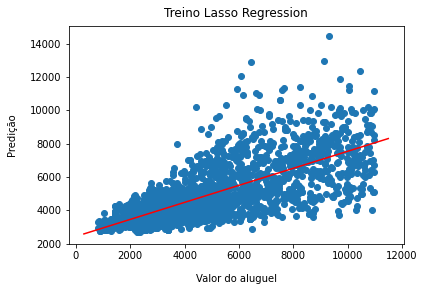

In [ ]:
correlation, p_value = stats.pearsonr(y_train, train_lasso_regression)
scatter_plot_with_correlation_line(y_train, train_lasso_regression,'Treino Lasso Regression'.format(correlation),'Valor do aluguel','Predição', 'correlation_mlr.png')

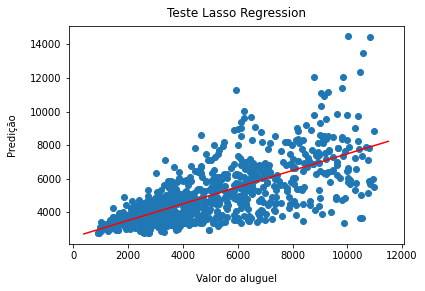

In [ ]:
correlation, p_value = stats.pearsonr(y_teste, test_lasso_gression)
scatter_plot_with_correlation_line(y_teste, test_lasso_gression,'Teste Lasso Regression'.format(correlation),'Valor do aluguel','Predição', 'correlation_mlr.png')


# Linear Regression

In [ ]:
linear_model = linear_model.LinearRegression()
modelRegression = linear_model.fit(x_train, y_train)

regression_train_prediction = modelRegression.predict(x_train)
print("Train MAE: ",mean_absolute_error(y_train, regression_train_prediction))

regression_test_predictions = modelRegression.predict(x_teste)
print("Test MAE: ",mean_absolute_error(y_teste, regression_test_predictions))
print("Score", score)
print('R2 = %s' % metrics.r2_score(y_teste, regression_test_predictions).round(2))

Train MAE:  1379.6607219660996
Test MAE:  1399.3127363380202
Score 0.4552583733806617
R2 = 0.48


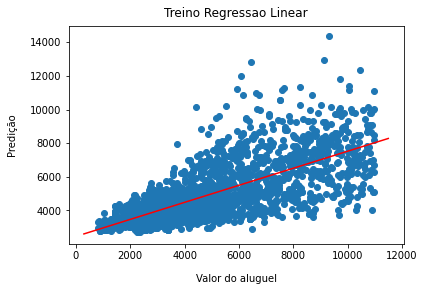

In [ ]:
correlation, p_value = stats.pearsonr(y_train, regression_train_prediction)
scatter_plot_with_correlation_line(y_train, regression_train_prediction,'Treino Regressao Linear'.format(correlation),'Valor do aluguel','Predição', 'correlation_mlr.png')

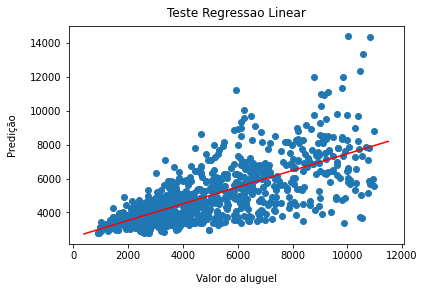

In [ ]:
correlation, p_value = stats.pearsonr(y_teste, regression_test_predictions)
scatter_plot_with_correlation_line(y_teste, regression_test_predictions,'Teste Regressao Linear'.format(correlation),'Valor do aluguel','Predição', 'correlation_mlr.png')

# Ridge Regression

In [ ]:
ridge_regression = Ridge(alpha=1.0)
modelRidge = ridge_regression.fit(x_train, y_train)

ridge_train_prediction = modelRidge.predict(x_train)
print("Train MAE: ",mean_absolute_error(y_train, ridge_train_prediction))

ridge_test_prediction = modelRidge.predict(x_teste)
print("Test MAE: ",mean_absolute_error(y_teste, ridge_test_prediction))

score = ridge_regression.score(x_teste, y_teste)
print("Score", score)

Train MAE:  1378.001355869376
Test MAE:  1397.8949896701547
Score 0.4807714393020425


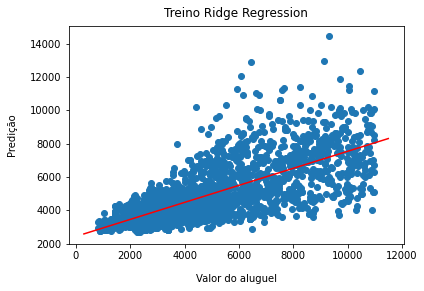

In [ ]:
correlation, p_value = stats.pearsonr(y_train, ridge_train_prediction)
scatter_plot_with_correlation_line(y_train, ridge_train_prediction,'Treino Ridge Regression'.format(correlation),'Valor do aluguel','Predição', 'correlation_mlr.png')

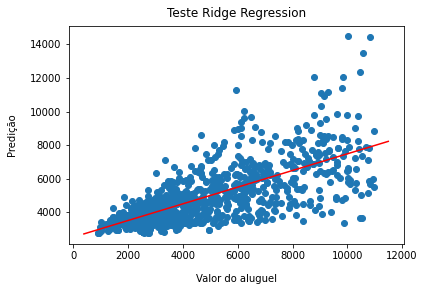

In [ ]:
correlation, p_value = stats.pearsonr(y_teste, ridge_test_prediction)
scatter_plot_with_correlation_line(y_teste, ridge_test_prediction,'Teste Ridge Regression'.format(correlation),'Valor do aluguel','Predição', 'correlation_mlr.png')

# Elastic Net

In [ ]:
elasticNet = ElasticNet(random_state=0)
modelElasticNet = elasticNet.fit(x_train, y_train)

elastic_train_prediction = modelElasticNet.predict(x_train)
print("Train MAE: ",mean_absolute_error(y_train, elastic_train_prediction))

elastic_test_prediction = modelElasticNet.predict(x_teste)
print("Test MAE: ",mean_absolute_error(y_teste, elastic_test_prediction))
print('R2 = %s' % metrics.r2_score(y_teste, elastic_test_prediction).round(2))

Train MAE:  1397.3537884128048
Test MAE:  1412.447469178159
R2 = 0.47


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2804737102.13723, tolerance: 1273860.6443853208
  positive)


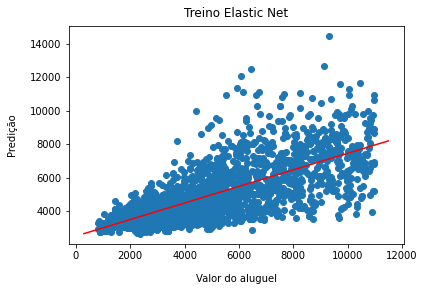

In [ ]:
correlation, p_value = stats.pearsonr(y_train, elastic_train_prediction)
scatter_plot_with_correlation_line(y_train, elastic_train_prediction,'Treino Elastic Net'.format(correlation),'Valor do aluguel','Predição', 'correlation_mlr.png')

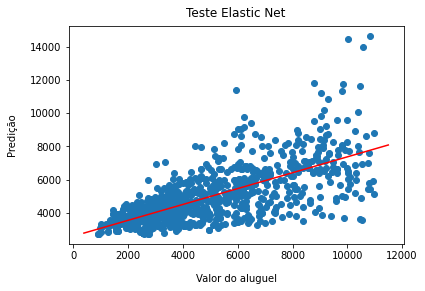

In [ ]:
correlation, p_value = stats.pearsonr(y_teste, elastic_test_prediction)
scatter_plot_with_correlation_line(y_teste, elastic_test_prediction,'Teste Elastic Net'.format(correlation),'Valor do aluguel','Predição', 'correlation_mlr.png')

# Lars

In [ ]:
lars = Lars(n_nonzero_coefs=1)
modelLars = lars.fit(x_train, y_train)

lars_train_prediction = modelLars.predict(x_train)
print("Train MAE: ",mean_absolute_error(y_train, lars_train_prediction))

lars_test_prediction = modelLars.predict(x_teste)
print("Test MAE: ",mean_absolute_error(y_teste, lars_test_prediction))
print("Score", score)
print('R2 = %s' % metrics.r2_score(y_teste, lars_test_prediction).round(2))

Train MAE:  1787.5632897226628
Test MAE:  1784.6750160332722
Score 0.4807714393020425
R2 = 0.25


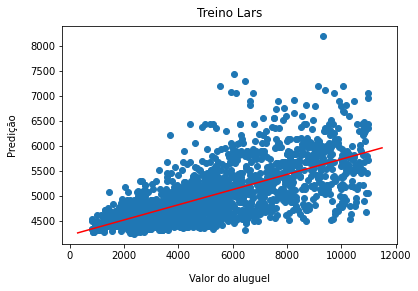

In [ ]:
correlation, p_value = stats.pearsonr(y_train, lars_train_prediction)
scatter_plot_with_correlation_line(y_train, lars_train_prediction,'Treino Lars'.format(correlation),'Valor do aluguel','Predição', 'correlation_mlr.png')

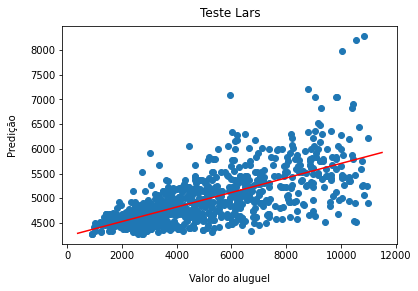

In [ ]:
correlation, p_value = stats.pearsonr(y_teste, lars_test_prediction)
scatter_plot_with_correlation_line(y_teste, lars_test_prediction,'Teste Lars'.format(correlation),'Valor do aluguel','Predição', 'correlation_mlr.png')

# Comparando modelos